In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Making a list of missing value types
missing_values = ["-"]
df = pd.read_csv("Gift_total_by_CSU_Since_FY2015.csv", na_values = missing_values)

In [ ]:
df.head()

,RANDOM_ID,CSU_CODE,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
0,THTKM076,CF,2020,5294631,50.0
1,THTKM076,DM,2016,205965,25.0
2,THTKM076,NS,2019,4808641,25.0
3,THTKM076,NS,2018,4447701,50.0
4,THTKM076,NS,2017,264264,25.0


In [ ]:
df.head()

,RANDOM_ID,CSU_CODE,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
0,THTKM076,CF,2020,5294631,50.0
1,THTKM076,DM,2016,205965,25.0
2,THTKM076,NS,2019,4808641,25.0
3,THTKM076,NS,2018,4447701,50.0
4,THTKM076,NS,2017,264264,25.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258148 entries, 0 to 258147
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RANDOM_ID            258148 non-null  object 
 1   CSU_CODE             258148 non-null  object 
 2   FISCAL_YEAR_ENDING   258148 non-null  int64  
 3   DONOR_INTENT_ID      258148 non-null  int64  
 4   TOTAL_AMT_2015_2020  258148 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ MB


In [ ]:
df.describe()

,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
count,258148.000000,2.581480e+05,258148.000000
mean,2017.348037,1.447095e+07,691.895821
std,1.669702,3.373806e+08,3640.849934
min,2015.000000,1.917000e+04,0.010000
25%,2016.000000,2.939698e+05,50.000000
50%,2017.000000,3.789638e+06,100.000000
75%,2019.000000,4.816206e+06,250.000000
max,2020.000000,1.001483e+10,99999.240000


In [ ]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:',df.shape[0])

Total number of observations in the dataset are: 258148


In [ ]:
# Check if data has duplicate entries

print(df.shape)
df = df.drop_duplicates(keep='first')
print('Shape after dropping the values: ',df.shape)

(258148, 5)
Shape after dropping the values:  (258148, 5)


In [ ]:
# Check if data has duplicate entries

print(df.shape)
df = df.drop_duplicates(keep='first')
print('Shape after dropping the values: ',df.shape)

(258148, 5)
Shape after dropping the values:  (258148, 5)


In [ ]:
# Check for missing values


# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    nullcount = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))

In [ ]:
check_col = ['CSU_CODE','FISCAL_YEAR_ENDING','DONOR_INTENT_ID','RANDOM_ID']
#-Check for zero values that shouldn't be there e.g. age, text, year

for col in check_col:
  count = 0
  for i in df[col]:
    if(i==0):
      count+=1
  print('Number of zeroes in ',col,'is -',count)

Number of zeroes in  CSU_CODE is - 0
Number of zeroes in  FISCAL_YEAR_ENDING is - 0
Number of zeroes in  DONOR_INTENT_ID is - 0
Number of zeroes in  RANDOM_ID is - 0


In [ ]:
#Check for levels of categorical variables

df['CSU_CODE'].value_counts()

GR    44733
NS    36418
EN    31900
LO    31584
LA    30856
CF    26779
CO    13485
ED     7528
DM     5650
NU     5519
PH     5181
SW     4712
JS     4240
AT     3659
LJ     3567
GL     2256
GS       81
Name: CSU_CODE, dtype: int64

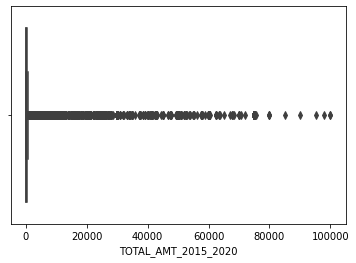

In [ ]:
sns.boxplot(x=df['TOTAL_AMT_2015_2020'])

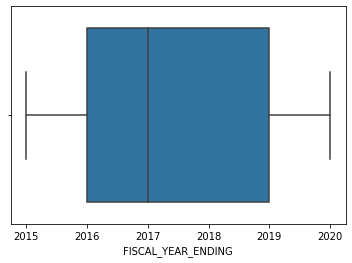

In [ ]:
sns.boxplot(x=df['FISCAL_YEAR_ENDING'])

In [ ]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out,'\n')
    return out

amnt_outlier = Zscore_outlier(df['TOTAL_AMT_2015_2020'])

Outliers: [50800.5, 49323.0, 50800.5, 49323.0, 25000.0, 25000.0, 25000.0, 25000.0, 30000.0, 30000.0, 50000.0, 50000.0, 25000.0, 50000.0, 25000.0, 50000.0, 60000.0, 60000.0, 25000.0, 25000.0, 50000.0, 50000.0, 25000.0, 12500.0, 25000.0, 25000.0, 12500.0, 25000.0, 25000.0, 25000.0, 25000.0, 25000.0, 50000.0, 50000.0, 25000.0, 12200.0, 12200.0, 50000.0, 50000.0, 12500.0, 12500.0, 50000.0, 25000.0, 50000.0, 25000.0, 25000.0, 25000.0, 50000.0, 50000.0, 12500.0, 12500.0, 50000.0, 50000.0, 25000.0, 25000.0, 25000.0, 25000.0, 25000.0, 25000.0, 30000.0, 25000.0, 30000.0, 25000.0, 25000.0, 25000.0, 50000.0, 50000.0, 25000.0, 37500.0, 25000.0, 37500.0, 12500.0, 12500.0, 25000.0, 22500.0, 25000.0, 22500.0, 20000.0, 12500.0, 20000.0, 12500.0, 50000.0, 50000.0, 41489.75, 41489.75, 25000.0, 25000.0, 25000.0, 25000.0, 58000.0, 25000.0, 25000.0, 26000.0, 26000.0, 50000.0, 50000.0, 15000.0, 25000.0, 25000.0, 25000.0, 25000.0, 25000.0, 15000.0, 15000.0, 50000.0, 50000.0, 20000.0, 20000.0, 25000.0, 25000.

(array([2.54571e+05, 1.43600e+03, 1.17100e+03, 1.22000e+02, 5.60000e+01,
        6.96000e+02, 3.80000e+01, 4.90000e+01, 4.00000e+00, 5.00000e+00]),
 array([1.0000000e-02, 9.9999330e+03, 1.9999856e+04, 2.9999779e+04,
        3.9999702e+04, 4.9999625e+04, 5.9999548e+04, 6.9999471e+04,
        7.9999394e+04, 8.9999317e+04, 9.9999240e+04]),
 <a list of 10 Patch objects>)

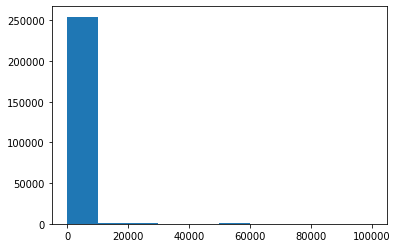

In [ ]:
plt.hist(df['TOTAL_AMT_2015_2020'])

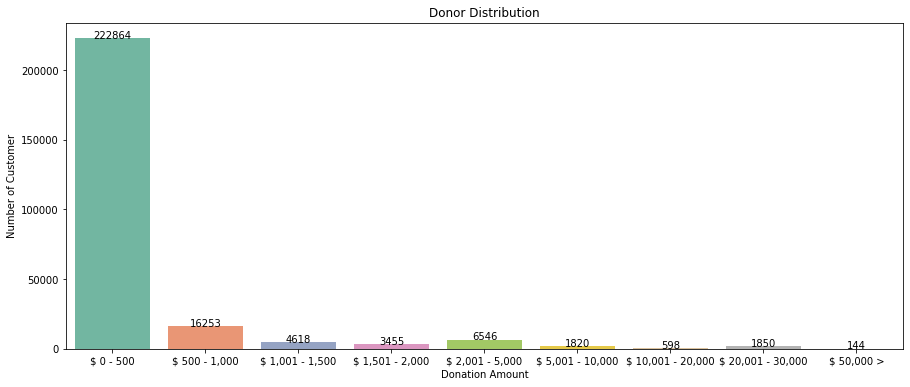

In [ ]:
ta0_500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] >= 0) & (df["TOTAL_AMT_2015_2020"] <= 500)]
ta500_1000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 500) & (df["TOTAL_AMT_2015_2020"] <= 1000)]
ta1000_1500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 1000) & (df["TOTAL_AMT_2015_2020"] <= 1500)]
ta1500_2000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 1500) & (df["TOTAL_AMT_2015_2020"] <= 2000)]
ta2000_5000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 2000) & (df["TOTAL_AMT_2015_2020"] <= 5000)]
ta5000_10000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 5000) & (df["TOTAL_AMT_2015_2020"] <= 10000)]
ta1000_20000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 10000) & (df["TOTAL_AMT_2015_2020"] <= 20000)]
ta2000_30000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 20000) & (df["TOTAL_AMT_2015_2020"] <= 50000)]
ta50000 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 50000)]

aix = ["$ 0 - 500", "$ 500 - 1,000", "$ 1,001 - 1,500", "$ 1,501 - 2,000", "$ 2,001 - 5,000","$ 5,001 - 10,000","$ 10,001 - 20,000","$ 20,001 - 30,000","$ 50,000 >"]
aiy = [len(ta0_500.values), len(ta500_1000.values), len(ta1000_1500.values), len(ta1500_2000.values), len(ta2000_5000.values),len(ta5000_10000),len(ta1000_20000),len(ta2000_30000),len(ta50000)]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=aix, y=aiy, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, aiy[i],ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

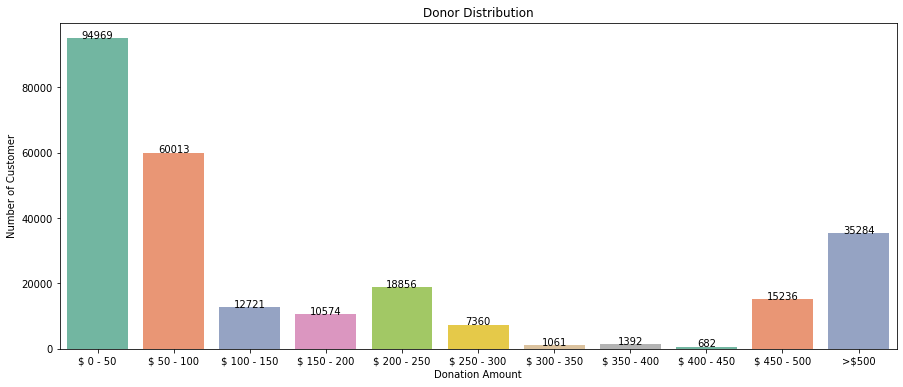

In [ ]:
ta0_50 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] >= 0) & (df["TOTAL_AMT_2015_2020"] <= 50)]
ta50_100 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 50) & (df["TOTAL_AMT_2015_2020"] <= 100)]
ta100_150 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 100) & (df["TOTAL_AMT_2015_2020"] <= 150)]
ta150_200 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 150) & (df["TOTAL_AMT_2015_2020"] <= 200)]
ta200_250 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 200) & (df["TOTAL_AMT_2015_2020"] <= 250)]
ta250_300 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 250) & (df["TOTAL_AMT_2015_2020"] <= 300)]
ta300_350 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 300) & (df["TOTAL_AMT_2015_2020"] <= 350)]
ta350_400 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 350) & (df["TOTAL_AMT_2015_2020"] <= 400)]
ta400_450 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 400) & (df["TOTAL_AMT_2015_2020"] <= 450)]
ta450_500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 450) & (df["TOTAL_AMT_2015_2020"] <= 500)]
ta500 = df["TOTAL_AMT_2015_2020"][(df["TOTAL_AMT_2015_2020"] > 500)]

aix1 = ["$ 0 - 50", "$ 50 - 100", "$ 100 - 150", "$ 150 - 200", "$ 200 - 250","$ 250 - 300","$ 300 - 350","$ 350 - 400","$ 400 - 450","$ 450 - 500",">$500"]
aiy1 = [len(ta0_50.values), len(ta50_100.values), len(ta100_150.values), len(ta150_200.values), len(ta200_250.values),len(ta250_300),len(ta300_350),len(ta350_400),len(ta400_450),len(ta450_500),len(ta500)]

plt.figure(figsize=(15,6))
ax1 = sns.barplot(x=aix1, y=aiy1, palette="Set2")


for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, aiy1[i],ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

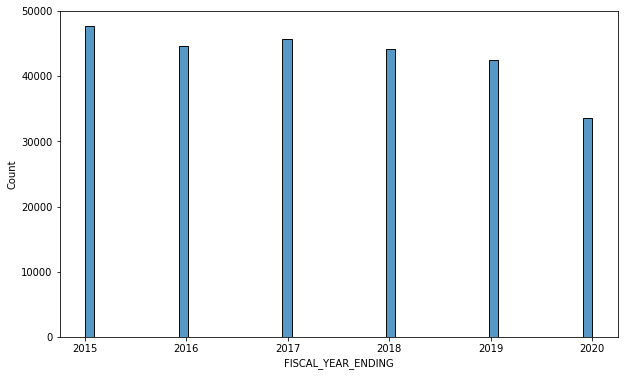

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['FISCAL_YEAR_ENDING'])

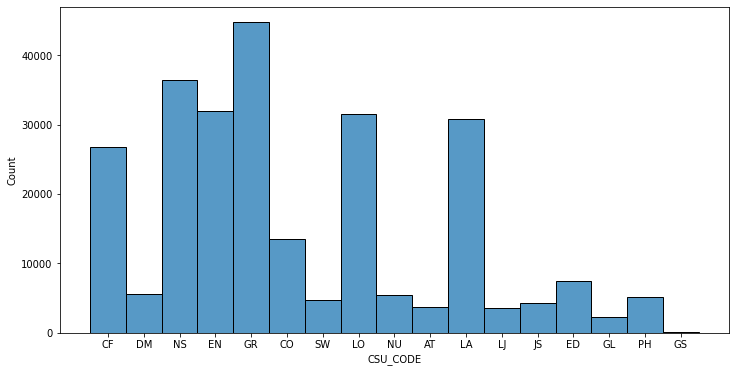

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['CSU_CODE'])

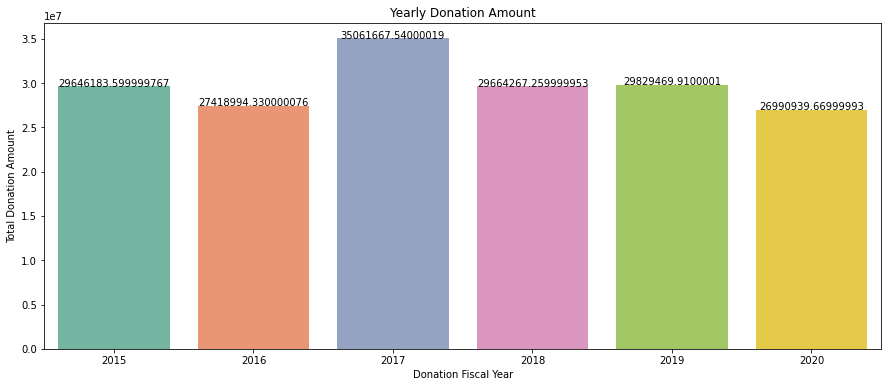

In [ ]:
amnt_per_year = df.groupby('FISCAL_YEAR_ENDING')['TOTAL_AMT_2015_2020'].sum()
amnt_per_year_df=amnt_per_year.to_frame().reset_index()
amnt_per_year_df

ax = amnt_per_year_df['FISCAL_YEAR_ENDING']
ay = amnt_per_year_df['TOTAL_AMT_2015_2020']

plt.figure(figsize=(15,6))
ax = sns.barplot(x=ax, y=ay, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, ay[i],ha="center")

plt.title("Yearly Donation Amount")
plt.xlabel("Donation Fiscal Year")
plt.ylabel("Total Donation Amount")
plt.show()

# Donation amount in 2020 was 26 million approx

In [ ]:
giving_year_count = df.groupby(['RANDOM_ID','FISCAL_YEAR_ENDING'])['TOTAL_AMT_2015_2020'].sum()

In [ ]:
giving_year_count

RANDOM_ID  FISCAL_YEAR_ENDING
00017EH9   2015                    15.00
000V0H91   2015                   250.00
001J3BUD   2015                   500.00
           2018                    25.00
           2020                   294.23
                                  ...   
ZZZC54VI   2015                  1499.94
           2017                  4999.80
ZZZPEPYG   2018                   100.00
           2019                   100.00
           2020                   250.00
Name: TOTAL_AMT_2015_2020, Length: 204258, dtype: float64

In [ ]:
user_yearly_data =  giving_year_count.to_frame().reset_index()
print(user_yearly_data)

       RANDOM_ID  FISCAL_YEAR_ENDING  TOTAL_AMT_2015_2020
0       00017EH9                2015                15.00
1       000V0H91                2015               250.00
2       001J3BUD                2015               500.00
3       001J3BUD                2018                25.00
4       001J3BUD                2020               294.23
...          ...                 ...                  ...
204253  ZZZC54VI                2015              1499.94
204254  ZZZC54VI                2017              4999.80
204255  ZZZPEPYG                2018               100.00
204256  ZZZPEPYG                2019               100.00
204257  ZZZPEPYG                2020               250.00

[204258 rows x 3 columns]


In [ ]:
user_yearly_data

,RANDOM_ID,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
0,00017EH9,2015,15.00
1,000V0H91,2015,250.00
2,001J3BUD,2015,500.00
3,001J3BUD,2018,25.00
4,001J3BUD,2020,294.23
...,...,...,...
204253,ZZZC54VI,2015,1499.94
204254,ZZZC54VI,2017,4999.80
204255,ZZZPEPYG,2018,100.00
204256,ZZZPEPYG,2019,100.00


In [ ]:
user_yearly_data_df = user_yearly_data.groupby(['RANDOM_ID']).nunique()
user_yearly_data_df

,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
RANDOM_ID,,
00017EH9,1,1
000V0H91,1,1
001J3BUD,3,3
001RB8B4,1,1
001TY1IF,5,3
...,...,...
ZZYT6KZ6,3,1
ZZZ7S81M,1,1
ZZZBT9C0,1,1


In [ ]:
user_yearly_data_df = user_yearly_data_df.drop(columns=['TOTAL_AMT_2015_2020'])
user_yearly_data_df = user_yearly_data_df.rename(columns={'index': 'RANDOM_ID','FISCAL_YEAR_ENDING':'Giving_Year_Count'}).reset_index()

In [ ]:
user_yearly_data_df

,RANDOM_ID,Giving_Year_Count
0,00017EH9,1
1,000V0H91,1
2,001J3BUD,3
3,001RB8B4,1
4,001TY1IF,5
...,...,...
98363,ZZYT6KZ6,3
98364,ZZZ7S81M,1
98365,ZZZBT9C0,1
98366,ZZZC54VI,2


In [ ]:
test = user_yearly_data_df['Giving_Year_Count'].value_counts() 
test

1    54694
2    16259
3     9298
4     6840
5     5870
6     5407
Name: Giving_Year_Count, dtype: int64

In [ ]:
year_data = dict(test)
donor_count = sum(test)
year_list = list(year_data.values())
print(year_data)
print('Total people who have donated: ',donor_count)

{1: 54694, 2: 16259, 3: 9298, 4: 6840, 5: 5870, 6: 5407}
Total people who have donated:  98368


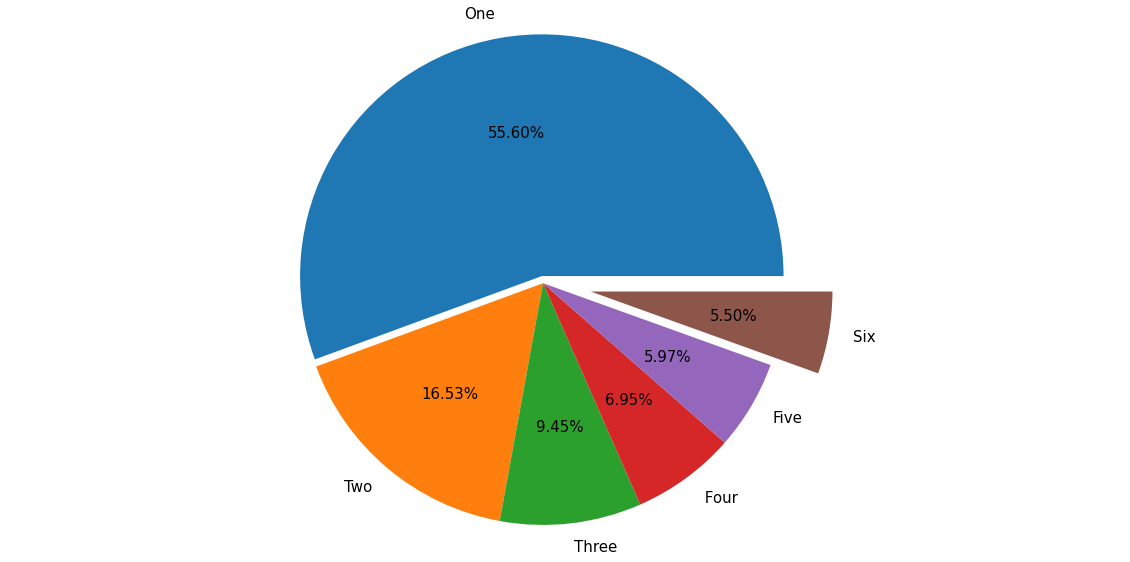

In [ ]:
#Pie Chart showing donor distribution
year_list

my_labels = 'One','Two','Three', ' Four','Five','Six'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.03,0,0,0,0,0.2] # To slice the perticuler section
plt.pie(year_list,labels=my_labels,autopct='%1.2f%%',explode=explode,textprops=textprops)
plt.axis('equal')
plt.show()

In [ ]:
dum_df = pd.get_dummies(df, columns=["FISCAL_YEAR_ENDING"], prefix=["Donation_Year_"])
dum_df 

,RANDOM_ID,CSU_CODE,DONOR_INTENT_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,CF,5294631,50.00,0,0,0,0,0,1
1,THTKM076,DM,205965,25.00,0,1,0,0,0,0
2,THTKM076,NS,4808641,25.00,0,0,0,0,1,0
3,THTKM076,NS,4447701,50.00,0,0,0,1,0,0
4,THTKM076,NS,264264,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,GR,3224609,100.00,1,0,0,0,0,0
258144,F3JAEMON,LA,3492004,40.00,1,0,0,0,0,0
258145,NQVCEOG8,NS,72452,100.00,1,0,0,0,0,0
258146,KL31U0S6,ED,83353,20.15,1,0,0,0,0,0


In [ ]:
## data pre processing
## Drop CSU_CODE and DONOR_INTENT_ID
dum_df = dum_df .drop(columns=['CSU_CODE','DONOR_INTENT_ID'])
dum_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,50.00,0,0,0,0,0,1
1,THTKM076,25.00,0,1,0,0,0,0
2,THTKM076,25.00,0,0,0,0,1,0
3,THTKM076,50.00,0,0,0,1,0,0
4,THTKM076,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,100.00,1,0,0,0,0,0
258144,F3JAEMON,40.00,1,0,0,0,0,0
258145,NQVCEOG8,100.00,1,0,0,0,0,0
258146,KL31U0S6,20.15,1,0,0,0,0,0


In [ ]:
giving_pattern_df = dum_df.groupby(by='RANDOM_ID').agg({'TOTAL_AMT_2015_2020': 'sum',
                              'Donation_Year__2015': 'sum',
                              'Donation_Year__2016': 'sum',
                              'Donation_Year__2017': 'sum',
                              'Donation_Year__2018': 'sum',
                              'Donation_Year__2019':'sum',
                              'Donation_Year__2020':'sum'}).reset_index()

In [ ]:
giving_pattern_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,00017EH9,15.00,1,0,0,0,0,0
1,000V0H91,250.00,1,0,0,0,0,0
2,001J3BUD,819.23,1,0,0,1,0,2
3,001RB8B4,485.14,0,0,0,0,2,0
4,001TY1IF,1050.00,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1
98364,ZZZ7S81M,500.00,0,1,0,0,0,0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0
98366,ZZZC54VI,6499.74,1,0,1,0,0,0


In [ ]:
#user_yearly_data_df 
df_merge = pd.merge(left=giving_pattern_df, right=user_yearly_data_df, left_on='RANDOM_ID', right_on='RANDOM_ID',how='left')
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count
0,00017EH9,15.00,1,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,3
3,001RB8B4,485.14,0,0,0,0,2,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,5
...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2


In [ ]:
def number_of_years_skipped(Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020):

  if ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016>0 and Donation_Year__2018 >0 and Donation_Year__2020 >0)):
    return 0
  elif ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2016>0 and Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1
  
  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1

  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  
  ### skips two year

  elif ((Donation_Year__2015>0 and Donation_Year__2018>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 == 0 and Donation_Year__2020 ==0)):
    return 2

  elif ((Donation_Year__2016>0 and Donation_Year__2019>0) and (Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2015 == 0 and Donation_Year__2020 ==0)):
    return 2
  
  elif ((Donation_Year__2017>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 2

    ### skips three year

  elif ((Donation_Year__2015>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 3

  elif ((Donation_Year__2016>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 3

    ### skips four year

  elif ((Donation_Year__2015>0 and Donation_Year__2020>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 4

  else:
    return 5



In [ ]:
df_merge['Skip_Years'] = df_merge.apply(lambda x: number_of_years_skipped(x['Donation_Year__2015'],x['Donation_Year__2016'],x['Donation_Year__2017'],x['Donation_Year__2018'],
                           x['Donation_Year__2019'],x['Donation_Year__2020']),axis=1)

In [ ]:
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count,Skip_Years
0,00017EH9,15.00,1,0,0,0,0,0,1,5
1,000V0H91,250.00,1,0,0,0,0,0,1,5
2,001J3BUD,819.23,1,0,0,1,0,2,3,5
3,001RB8B4,485.14,0,0,0,0,2,0,1,5
4,001TY1IF,1050.00,1,1,1,1,0,3,5,5
...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3,5
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,5
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,5
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2,5


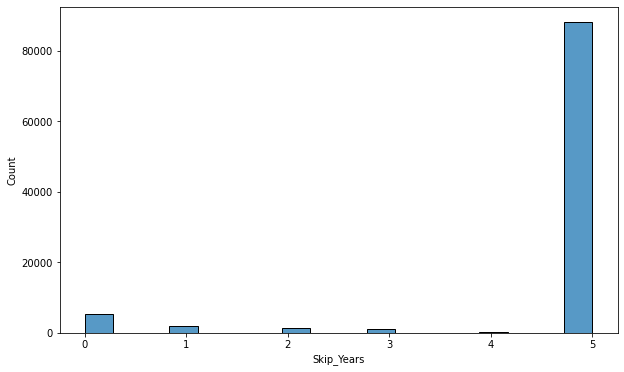

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_merge['Skip_Years'])

In [ ]:
skip_list = df_merge['Skip_Years'].value_counts()
skip_data = dict(skip_list)
skip_yr_list = list(skip_data.values())
print(skip_data)
skip_yr_list


{5: 88147, 0: 5407, 1: 2006, 2: 1436, 3: 1020, 4: 352}


[88147, 5407, 2006, 1436, 1020, 352]

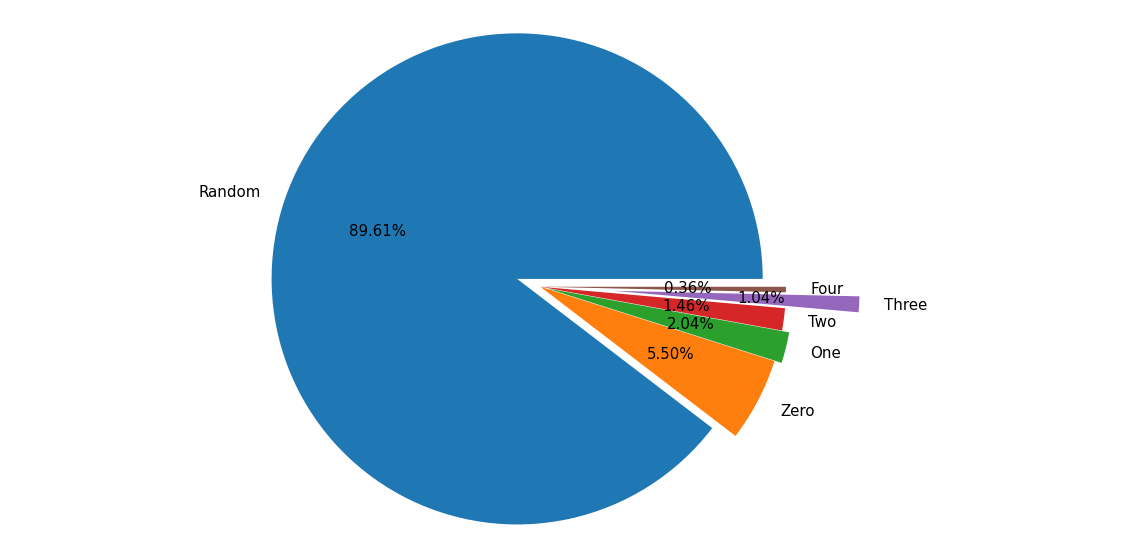

In [ ]:
### plotting the skipping pattern
#Pie Chart showing donor distribution
skip_yr_list

skip_labels = 'Random','Zero','One', 'Two','Three','Four'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.03,0.,0.3,0.0] # To slice the perticuler section
plt.pie(skip_yr_list,labels=skip_labels,explode=explode, autopct='%1.2f%%',textprops=textprops)
plt.axis('equal')
plt.show()

In [ ]:
dum_df1 = pd.get_dummies(df_merge, columns=["Giving_Year_Count"], prefix=["Giving_Year_Count_"])
dum_df1 

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Skip_Years,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6
0,00017EH9,15.00,1,0,0,0,0,0,5,1,0,0,0,0,0
1,000V0H91,250.00,1,0,0,0,0,0,5,1,0,0,0,0,0
2,001J3BUD,819.23,1,0,0,1,0,2,5,0,0,1,0,0,0
3,001RB8B4,485.14,0,0,0,0,2,0,5,1,0,0,0,0,0
4,001TY1IF,1050.00,1,1,1,1,0,3,5,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,5,0,0,1,0,0,0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,5,1,0,0,0,0,0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,5,1,0,0,0,0,0
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,5,0,1,0,0,0,0


In [ ]:
dum_df2 = pd.get_dummies(dum_df1, columns=["Skip_Years"], prefix=["Skip_Years_Count_"], sparse=True)
dum_df2 

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6,Skip_Years_Count__0,Skip_Years_Count__1,Skip_Years_Count__2,Skip_Years_Count__3,Skip_Years_Count__4,Skip_Years_Count__5
0,00017EH9,15.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1
3,001RB8B4,485.14,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_corr = dum_df2[['Giving_Year_Count__1','Giving_Year_Count__2','Giving_Year_Count__3','Giving_Year_Count__4','Giving_Year_Count__5','Giving_Year_Count__6']]

In [ ]:
corrMatrix1 = df_corr.corr()

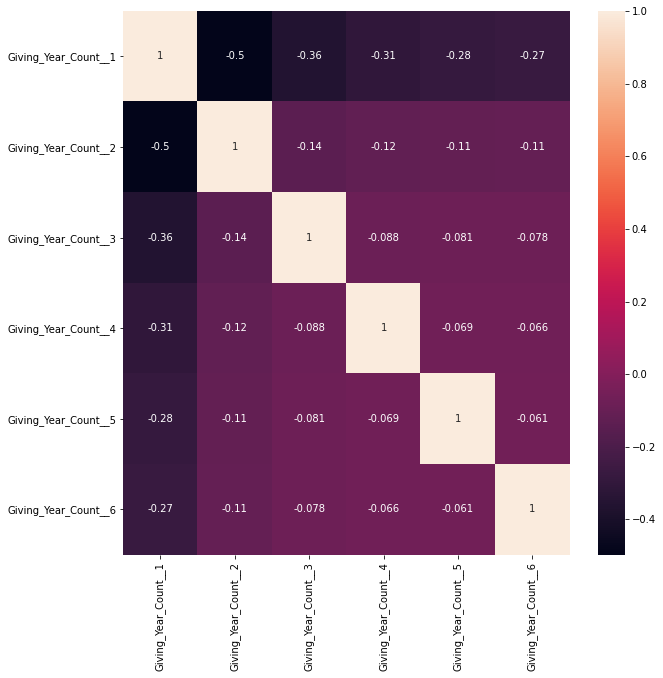

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

In [ ]:
df_corr_skip = dum_df2[['Skip_Years_Count__1','Skip_Years_Count__2','Skip_Years_Count__3','Skip_Years_Count__4']]

In [ ]:
corrMatrix2 = df_corr_skip.corr()

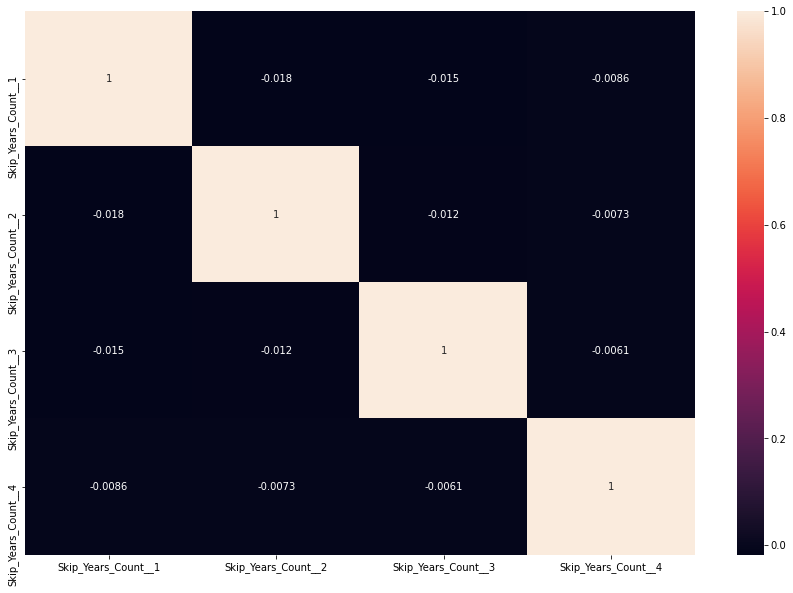

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix2, annot=True)
plt.show()

In [ ]:
final_corr = dum_df2[['Giving_Year_Count__1','Giving_Year_Count__2','Giving_Year_Count__3','Giving_Year_Count__4','Giving_Year_Count__5','Giving_Year_Count__6','Skip_Years_Count__1','Skip_Years_Count__2','Skip_Years_Count__3','Skip_Years_Count__4']]

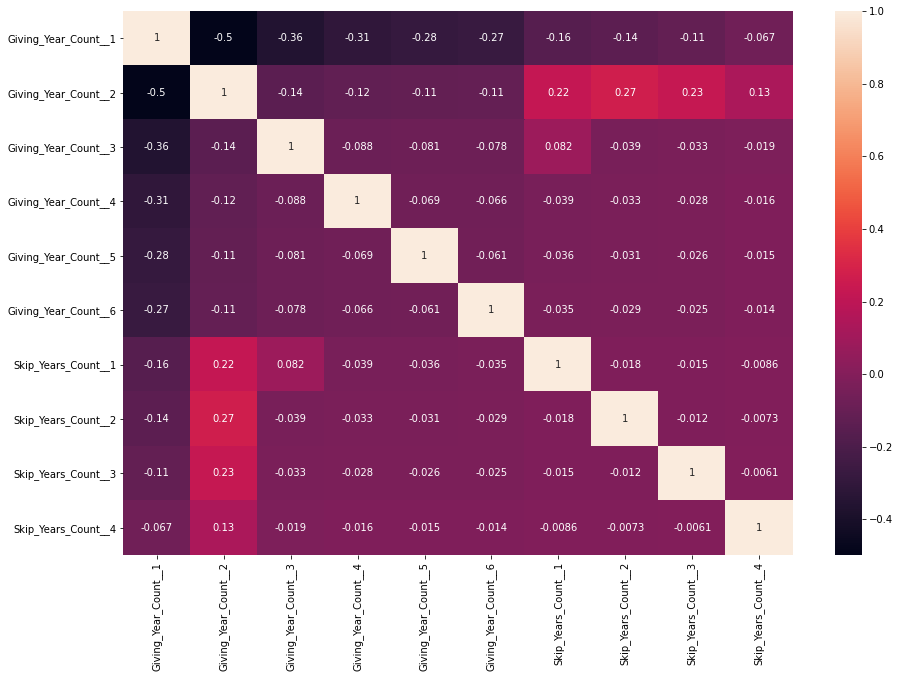

In [ ]:

plt.figure(figsize=(15,10))
corrMatrix3 = final_corr.corr()
sns.heatmap(corrMatrix3, annot=True)
plt.show()